In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from sklearn.model_selection import train_test_split
%matplotlib inline


## Get the data ##

In [2]:
pwd = os.getcwd()
path = os.path.join(pwd,"housing.csv")
path

'C:\\Users\\user\\Desktop\\MLPROJE\\housing.csv'

In [3]:
house_pricing=pd.read_csv(path)

In [4]:
house_pricing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Explore the Data ##

In [5]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#the type of the feature "ocean_proximity" is object so let's see the categories 
house_pricing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#get an idea about the other numerical features
house_pricing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

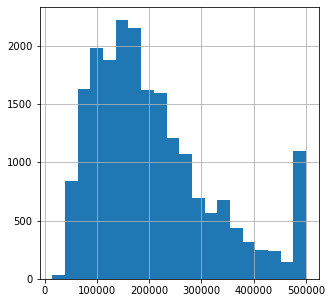

In [8]:
house_pricing['median_house_value'].hist(bins=20, figsize=(5,5))

## Split Dataset ##
#### to avoid overfitting it's better to set the test set earlier, and continue visualising only the training set, in order to not detect any patterns that may influence our choices concerning the model ####

In [9]:
#preparing the data 
house_pricing=house_pricing.dropna(subset=["total_bedrooms"])
X = house_pricing.drop("median_house_value", axis=1)
y = house_pricing["median_house_value"]


In [44]:
#split the data 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=179)
print(X_train.shape)
print(X_test.shape)

(14303, 9)
(6130, 9)


## Data visualization ##

#### we are going to visualize a copy of the traning to not affect the original dataset ####

In [45]:
cpy=X_train.copy()

<IPython.core.display.Javascript object>


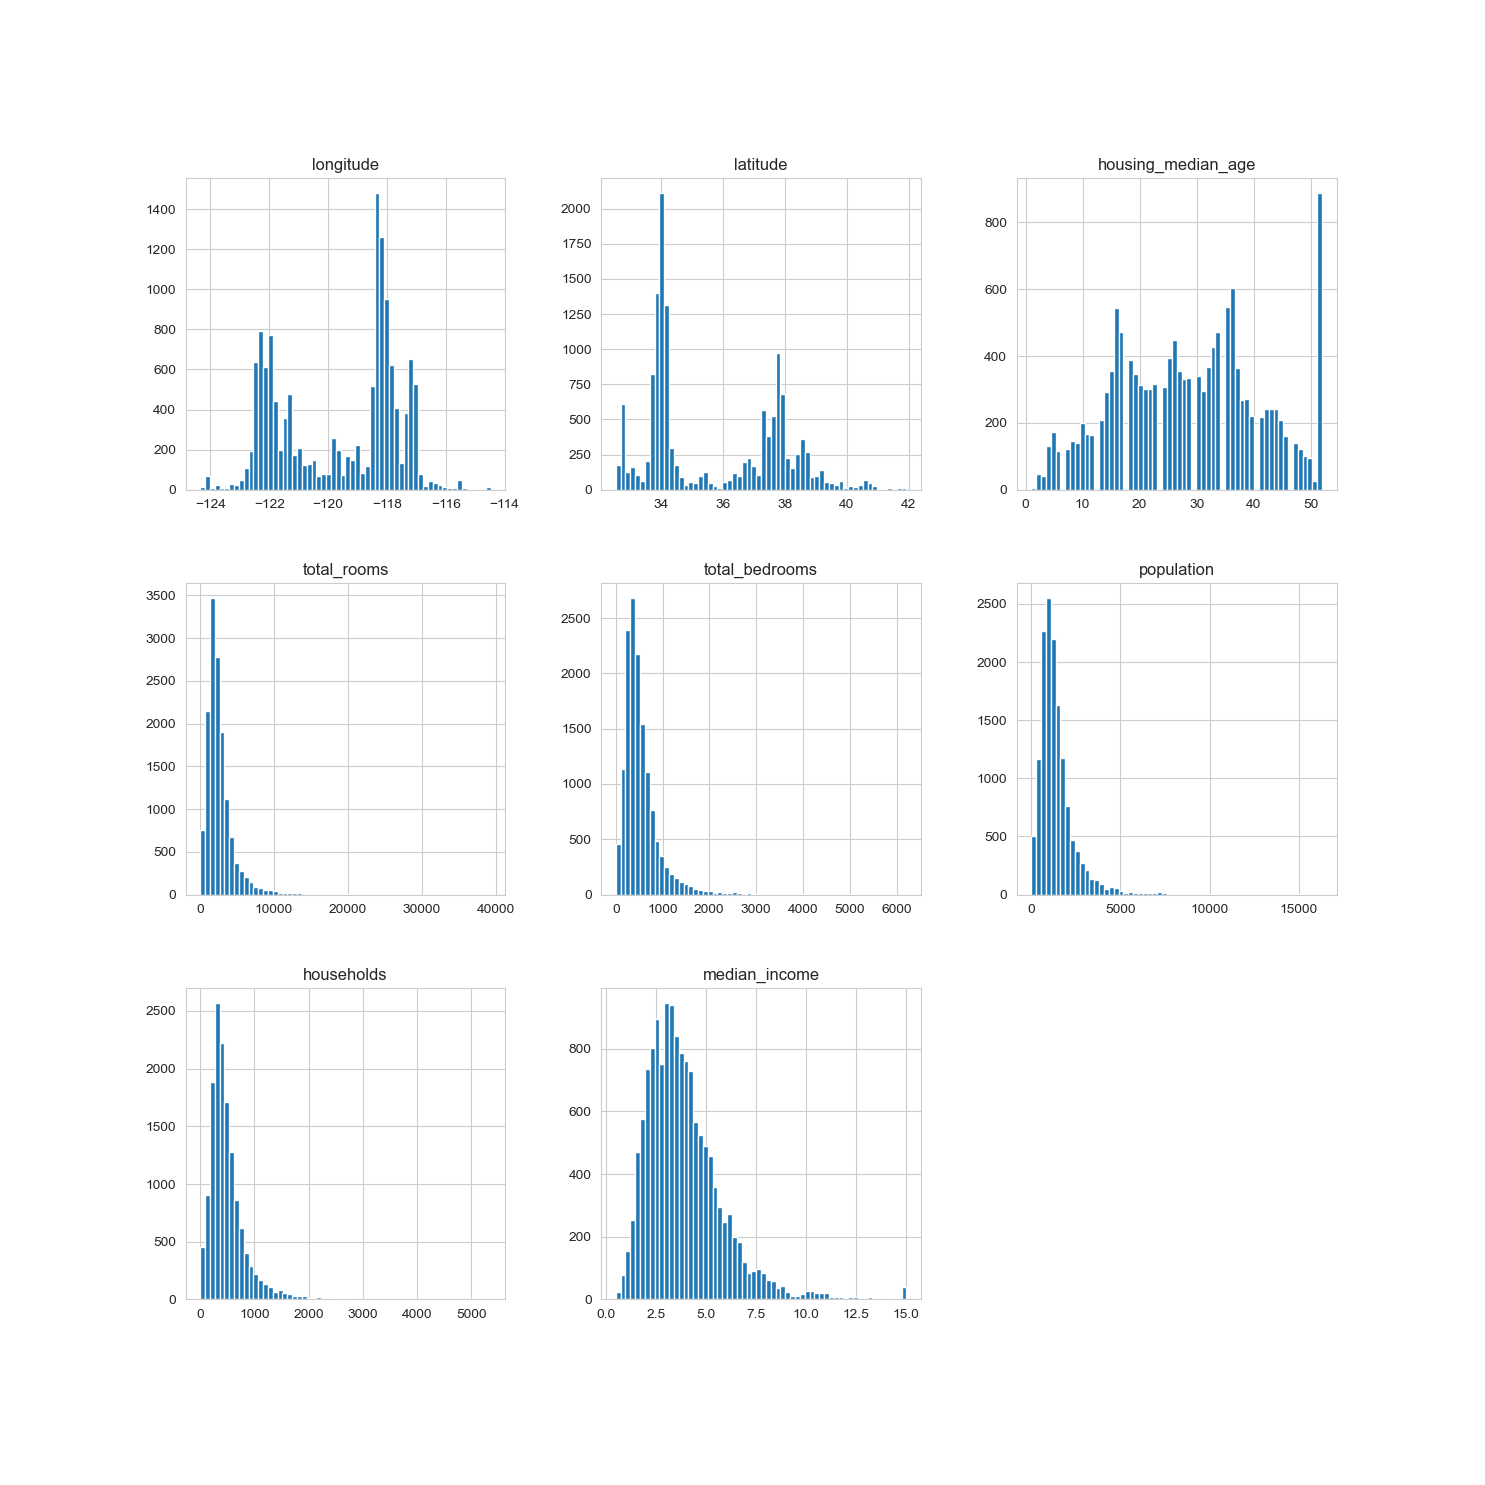

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>, <AxesSubplot:>]],
      dtype=object)

In [46]:
cpy.hist(bins=60, figsize=(15,15))

<IPython.core.display.Javascript object>


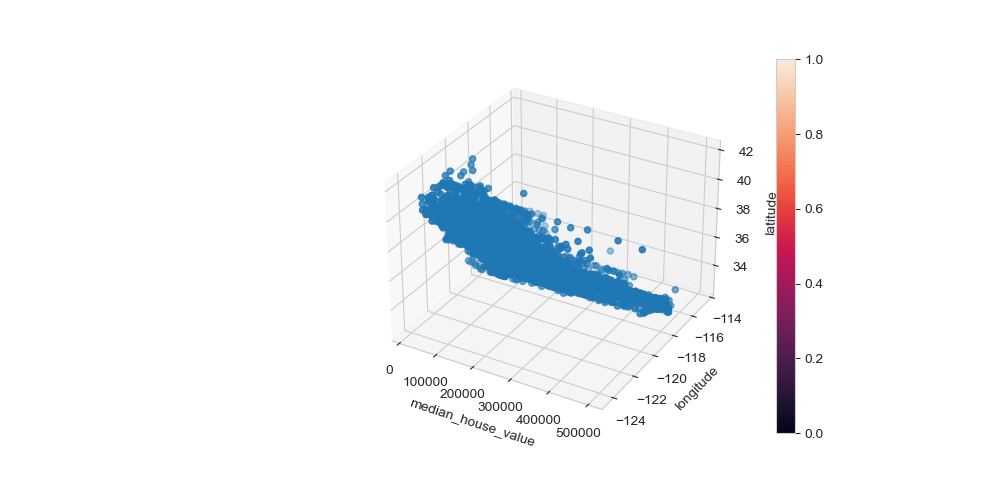

In [47]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
scatter_plot =ax.scatter(y_train, cpy["longitude"], cpy["latitude"], marker='o',cmap =plt.get_cmap("jet"))
ax.set_xlabel('median_house_value')
ax.set_ylabel('longitude')
ax.set_zlabel('latitude')
plt.colorbar(scatter_plot)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


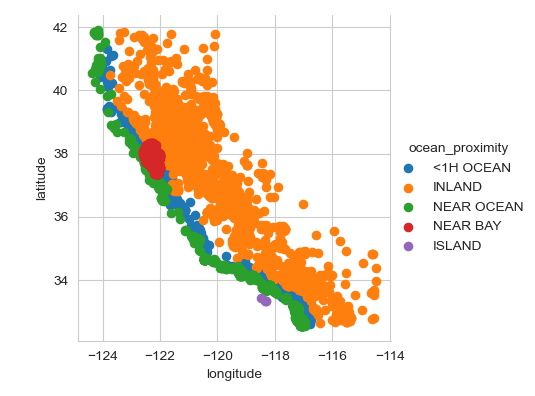

In [48]:
sns.set_style("whitegrid")
sns.FacetGrid(cpy, hue="ocean_proximity", size=4) \
   .map(plt.scatter, "longitude", "latitude") \
   .add_legend()
plt.show()

In [49]:
#the correlation matrix

<IPython.core.display.Javascript object>


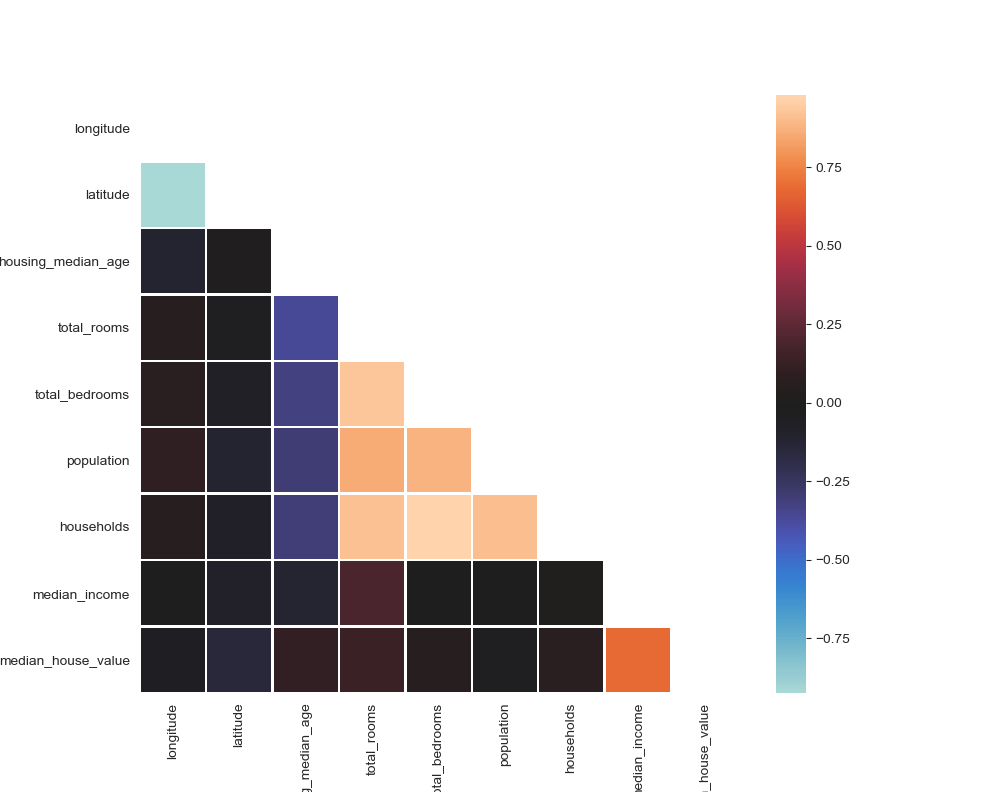

<AxesSubplot:>

In [50]:
corr = house_pricing.corr()
mask =np.triu(np.ones_like(corr,dtype=bool))
f,ax =plt.subplots(figsize=(10,8))
sns.heatmap(corr,mask=mask,center=0,square=True,linewidths=1)


## Prepare the Data ##

In [51]:
X_train_cat=cpy[['ocean_proximity']]
X_train_cat

,ocean_proximity
11385,<1H OCEAN
3836,<1H OCEAN
13096,INLAND
15314,NEAR OCEAN
18225,NEAR BAY
...,...
14614,NEAR OCEAN
16836,NEAR OCEAN
19333,<1H OCEAN
23,NEAR BAY


In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_train_cat_1hot=encoder.fit_transform(X_train_cat)
X_train_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
#scaling our data 
X_train_num=cpy.select_dtypes(include=[np.number])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_num)
X_train_scaled


array([[ 0.82458939, -0.93443812, -0.52296516, ..., -0.30430272,
        -0.28183812,  1.81784805],
       [ 0.57988418, -0.68624954,  0.66625718, ..., -0.39845463,
        -0.39977387,  0.5777215 ],
       [-0.84839522,  1.33672146, -0.76080963, ..., -0.87926925,
        -0.9606239 ,  0.13330666],
       ...,
       [-1.55754093,  1.36950108, -1.95003197, ...,  1.38677531,
         1.42429913,  0.60673918],
       [-1.33281166,  1.02297364,  1.85547953, ..., -0.51728714,
        -0.45743135, -0.89637639],
       [-1.20796206,  1.08853289,  0.66625718, ..., -0.58218797,
        -0.44170658, -0.24904696]])

In [54]:
#concatenating all the data 
newone_X_train =np.hstack([X_train_scaled,X_train_cat_1hot])
newone_X_train

array([[ 0.82458939, -0.93443812, -0.52296516, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57988418, -0.68624954,  0.66625718, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84839522,  1.33672146, -0.76080963, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.55754093,  1.36950108, -1.95003197, ...,  0.        ,
         0.        ,  0.        ],
       [-1.33281166,  1.02297364,  1.85547953, ...,  0.        ,
         1.        ,  0.        ],
       [-1.20796206,  1.08853289,  0.66625718, ...,  0.        ,
         1.        ,  0.        ]])

## Pipeline ##

In [55]:
def transform(X):
    
    from sklearn.preprocessing import OneHotEncoder
    data_cat=X[['ocean_proximity']]
    encoder = OneHotEncoder(sparse=False)
    data_cat_1hot=encoder.fit_transform(data_cat)
    
    
    
    
    data_num=X.select_dtypes(include=[np.number])
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data_scaled=scaler.fit_transform(data_num)
    
    
    final_X=np.hstack([data_scaled,data_cat_1hot])
    
    return final_X
    
    
    
    
    

In [56]:
#apply the transformation to the traing set and the testing set 

new_X_train=transform(X_train)
new_X_train.shape


(14303, 13)

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(new_X_train,y_train)

LinearRegression()

In [58]:
new_X_test=transform(X_test)
new_X_test.shape

(6130, 13)

In [59]:
y_train_pred =lin_reg.predict(new_X_train)
y_test_pred =lin_reg.predict(new_X_test)

In [60]:
from sklearn.metrics import mean_squared_error
print(f'Train RMSE :{np.sqrt(mean_squared_error(y_train,y_train_pred)):.0f}')
print(f'Test RMSE :{np.sqrt(mean_squared_error(y_test,y_test_pred)):.0f}')

Train RMSE :68966
Test RMSE :68067
